In [29]:
from sklearn.datasets import load_iris
import numpy as np
import pandas as pd

In [30]:
iris = load_iris()
X = iris.data
y = iris.target

In [31]:
# какие классы
np.unique(y)

array([0, 1, 2])

In [36]:
# необходимо оставить Iris Versicolor, Iris Virginica
# X признаки, форма (150, 4)
# y метки классов, длина 150

# В итоге mask - это массив из True / False:
mask = (y == 1) | (y == 2)
# Возьми из X только те строки, где mask == True
X = X[mask]
# Возьми из y только те строки, где mask == True
y = y[mask]
mask

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True])

In [37]:
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [38]:
# Преобразуем метки классов в бинарный формат:
# Iris Versicolor (1) -> 0
# Iris Virginica (2) -> 1
y = (y == 2).astype(int)
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

Самостоятельно реализуйте логистическую регрессию, без использования метода LogisticRegression из библиотеки. Можете использовать библиотеки pandas, numpy, math для реализации. Оформите в виде функции. *Оформите в виде класса с методами.

Из каких частей состоит логистическая регрессия
Логистическая регрессия - это НЕ одна формула, а набор шагов.
Вот полный список, что нам нужно реализовать:
1 Сигмоида
Преобразует любое число в вероятность от 0 до 1
2 Линейная часть
Считает взвешенную сумму признаков:
z = X·w + b
3 Предсказание вероятности
Передаём z в сигмоиду - получаем вероятность класса 1
4 Предсказание класса
Если вероятность ≥ 0.5 - класс 1, иначе 0
5 Функция потерь 
Показывает, насколько плохо модель ошибается
6 Обучение (оптимизация)
Обновляем веса, чтобы ошибка уменьшалась
(градиентный спуск, RMSProp, Nadam)

Реализаация сигмойды
Модель сначала считает обычное число (оно может быть большим, маленьким, отрицательным)
Но нам нужно: не просто число, а вероятность: от 0 до 1

In [39]:
import numpy as np

def sigmoid(z):
    """
    Сигмоидная функция.
    Преобразует любое число или массив чисел
    в значения от 0 до 1.
    """
    return 1 / (1 + np.exp(-z))


In [40]:
sigmoid(0)

np.float64(0.5)

In [41]:
sigmoid(np.array([-5, -1, 0, 1, 5]))

array([0.00669285, 0.26894142, 0.5       , 0.73105858, 0.99330715])

Линейная часть логистической регрессии

Реализуем часть модели, которая считает: z = X · w + b
Где:
X - признаки
w - веса (то, что модель будет учить)
b - смещение (bias)\

Зачем вообще нужна линейная часть
Модель должна:
смотреть на признаки объекта;
учитывать их с разной важностью;
складывать всё в одно число.
Это число потом пойдёт в сигмоиду.

In [ ]:
X.shape
# (100, 4)

y.shape
# (100,)

""" 
Это значит:
100 объектов
4 признака у каждого
"""

(100,)

In [67]:
# класс логистической регрессии

class LogisticRegressionFromScratch:
    def __init__(self, lr=0.01, n_iters=1000):
        """
        Инициализация модели.
        Пока только создаём переменные под веса и смещение.
        """
        self.w = None  # веса
        self.b = None  # смещение

        """
        lr — скорость обучения (learning rate)
        n_iters — количество итераций обучения
        """
        self.lr = lr
        self.n_iters = n_iters

    # линейная часть модели
    def linear_model(self, X):
        """
        Линейная часть модели: X · w + b
        """
        return np.dot(X, self.w) + self.b
    
    # Предсказание вероятности (predict_proba)
    def predict_proba(self, X):
        """
        Возвращает вероятность принадлежности к классу 1
        для каждого объекта.
        """
        z = self.linear_model(X)     # X · w + b
        return sigmoid(z)            # переводим в вероятность
    
    def predict(self, X):
        """
        Возвращает предсказанный класс (0 или 1)
        для каждого объекта.
        """
        probabilities = self.predict_proba(X)
        return (probabilities >= 0.5).astype(int)
    
    def loss(self, y_true, y_pred_proba):
        """
        Функция потерь (log loss).
        y_true — истинные метки (0 или 1)
        y_pred_proba — предсказанные вероятности
        """

        """ 
        маленькое число
        нужно, чтобы не было log(0)
        техническая защита
        """
        eps = 1e-15  # защита от log(0)
        

        # Ограничиваем вероятности: 0 < y_pred_proba < 1
        y_pred_proba = np.clip(y_pred_proba, eps, 1 - eps)
        
        ''' 
        np.mean(...) 
        берём среднюю ошибку по всем объектам
        получаем одно число
        '''
        loss = -np.mean(
            # наказывает, если вероятность класса 1 маленькая, а класс = 1
            y_true * np.log(y_pred_proba) +
            # наказывает, если вероятность класса 0 маленькая, а класс = 0
            (1 - y_true) * np.log(1 - y_pred_proba)
        )

        ''' 
        Что возвращает loss
            одно число
            всегда ≥ 0
            чем меньше - тем лучше модель
        '''
        return loss
    
    def fit(self, X, y):

        n_samples, n_features = X.shape
        """
        Обучение модели с помощью градиентного спуска.
        """
        n_samples, n_features = X.shape
        
        # 1 Инициализация весов нулями
        self.w = np.zeros(n_features)
        self.b = 0

        self.losses = []  # будем сохранять значения ошибки

        # 2 Основной цикл обучения
        for _ in range(self.n_iters):
            
            # Предсказание вероятностей
            y_pred_proba = self.predict_proba(X)

            # считаем и сохраняем loss
            loss = self.loss(y, y_pred_proba)
            self.losses.append(loss)

            # Вычисление градиентов
            dw = (1 / n_samples) * np.dot(X.T, (y_pred_proba - y))
            db = (1 / n_samples) * np.sum(y_pred_proba - y)

            # Обновление весов
            self.w -= self.lr * dw
            self.b -= self.lr * db
            

    def fit_rmsprop(self, X, y, beta=0.9, eps=1e-8):
        n_samples, n_features = X.shape

        self.w = np.zeros(n_features)
        self.b = 0

        vw = np.zeros(n_features)
        vb = 0

        for _ in range(self.n_iters):
            y_pred = self.predict_proba(X)

            dw = (1 / n_samples) * np.dot(X.T, (y_pred - y))
            db = (1 / n_samples) * np.sum(y_pred - y)

            vw = beta * vw + (1 - beta) * (dw ** 2)
            vb = beta * vb + (1 - beta) * (db ** 2)

            self.w -= self.lr * dw / (np.sqrt(vw) + eps)
            self.b -= self.lr * db / (np.sqrt(vb) + eps)

    
    
    def fit_nadam(self, X, y, beta1=0.9, beta2=0.999, eps=1e-8):
        n_samples, n_features = X.shape

        self.w = np.zeros(n_features)
        self.b = 0

        mw = np.zeros(n_features)
        vw = np.zeros(n_features)
        mb = 0
        vb = 0

        for t in range(1, self.n_iters + 1):
            y_pred = self.predict_proba(X)

            dw = (1 / n_samples) * np.dot(X.T, (y_pred - y))
            db = (1 / n_samples) * np.sum(y_pred - y)

            mw = beta1 * mw + (1 - beta1) * dw
            vw = beta2 * vw + (1 - beta2) * (dw ** 2)

            mb = beta1 * mb + (1 - beta1) * db
            vb = beta2 * vb + (1 - beta2) * (db ** 2)

            mw_hat = mw / (1 - beta1 ** t)
            vw_hat = vw / (1 - beta2 ** t)

            self.w -= self.lr * mw_hat / (np.sqrt(vw_hat) + eps)
            self.b -= self.lr * mb / (np.sqrt(vb) + eps)



    

class LogisticRegressionFromScratch:
cоздаём свою модель, а не используем sklearn
self.w - веса для каждого признака - их будет столько же, сколько признаков
self.b - одно число (смещение)

np.dot(X, self.w)
X имеет форму (n_samples, n_features)
w имеет форму (n_features,)
результат - массив из n_samples чисел
Для каждого объекта считается:
x1*w1 + x2*w2 + x3*w3 + x4*w4

+ self.b
добавляем одно число ко всем результатам
NumPy делает это автоматически


Предсказание вероятности (predict_proba)
Соединяем:
линейную часть X · w + b + сигмоиду
И получаем:
вероятность того, что объект относится к классу 1

Модель считает одно число для каждого объекта
Это число может быть любым (–100, 0, 50 и т.д.)
Мы пропускаем его через сигмоиду
Получаем число от 0 до 1 - вероятность

Предсказание класса (predict)
Зачем нужен predict, если есть predict_proba
predict_proba(X) - даёт вероятность (число от 0 до 1)
predict(X) - даёт конечный ответ модели: 0 или 1
В задачах классификации именно predict используют для оценки качества.


Логика метода predict (без кода)
Получаем вероятность класса 1
Сравниваем её с порогом (обычно 0.5)
Если:
вероятность ≥ 0.5 → класс 1
вероятность < 0.5 → класс 0

probabilities = self.predict_proba(X)
вызываем уже написанный метод
получаем массив, например: [0.12, 0.87, 0.45, 0.92]

(probabilities >= 0.5)
сравнение для каждого элемента
результат: [False, True, False, True]

.astype(int)
False → 0
True → 1
[0, 1, 0, 1] Это и есть предсказанные классы.


Все эти методы реализовали логистическую регрессия без обучения.

Функция потерь (loss)
Зачем вообще нужна функция потерь
Модель должна понимать:
насколько плохо она сейчас предсказывает
Функция потерь:
возвращает одно число;
чем оно меньше, тем лучше модель;
именно его мы будем уменьшать при обучении.
Без функции потерь градиентный спуск невозможен.
Какую функцию потерь мы используем
Для логистической регрессии используется
log loss (логарифмическая функция потерь).
по смыслу она:
сильно наказывает уверенные ошибки;
слабо наказывает неуверенные ошибки;
идеально подходит для вероятностей.

Модель должна бояться уверенно ошибаться.

Обучение модели — градиентный спуск (fit)
Что значит «обучить модель» простыми словами
Обучение = подобрать такие веса w и b, чтобы ошибка была минимальной.
Мы будем:
считать предсказания;
считать ошибку (loss);
чуть-чуть менять веса, чтобы ошибка уменьшалась;
повторять это много раз.
Это и есть градиентный спуск.

Разбор КАЖДОГО шага
1 self.w = np.zeros(n_features)
начинаем с нулевых весов;
модель пока «ничего не знает».
2 for _ in range(self.n_iters):
повторяем процесс много раз;
на каждом шаге модель становится чуть лучше.
3 y_pred_proba = self.predict_proba(X)
считаем текущие вероятности;
используем уже написанный код.
4 Градиенты dw и db
y_pred_proba - y y_pred_proba - y
np.dot(X.T, ...)
распределяет ошибку по признакам;
говорит, какие веса менять сильнее.
5 Обновление весов

self.w -= self.lr * dw
self.b -= self.lr * db
шаг в сторону уменьшения ошибки;
lr контролирует размер шага.


Важно
не подбираем формулы вручную — они стандартные;
это и есть обучение модели.

In [56]:
model = LogisticRegressionFromScratch(lr=0.1, n_iters=1000)
model.fit(X, y)

loss = model.loss(y, model.predict_proba(X))
loss

np.float64(0.16706111411895827)

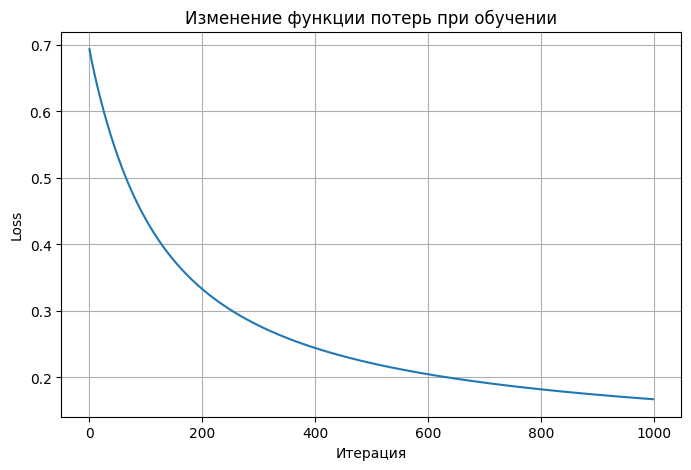

In [57]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.plot(model.losses)
plt.title("Изменение функции потерь при обучении")
plt.xlabel("Итерация")
plt.ylabel("Loss")
plt.grid(True)
plt.show()

На графике видно, что значение функции потерь уменьшается с увеличением числа итераций, что говорит о корректной работе градиентного спуска и обучении модели.

In [59]:
loss_gd = model.loss(y, model.predict_proba(X))
loss_gd

np.float64(0.16706111411895827)

In [61]:
y_pred = model.predict(X)
acc_gd = np.mean(y_pred == y)
acc_gd

np.float64(0.97)

In [63]:
results = pd.DataFrame({
    "Метод оптимизации": ["Gradient Descent"],
    "Loss": [loss_gd],
    "Accuracy": [acc_gd]
})

results


,Метод оптимизации,Loss,Accuracy
0,Gradient Descent,0.167061,0.97


RMSProp (Root Mean Square Propagation)
Идея RMSProp простыми словами
Обычный GD:
делает шаг одного размера всегда
RMSProp:
уменьшает шаг для признаков, где градиент часто большой
делает обучение более стабильным
Это полезно, когда данные «шумные».

Что добавляется по сравнению с GD
память для квадратов градиентов
коэффициент затухания beta

In [66]:
# Обучение и метрика (RMSProp)
model_rms = LogisticRegressionFromScratch(lr=0.01, n_iters=1000)
model_rms.fit_rmsprop(X, y)

loss_rms = model_rms.loss(y, model_rms.predict_proba(X))
acc_rms = np.mean(model_rms.predict(X) == y)


adam (Nesterov + Adam)
Идея Nadam очень коротко
Nadam:
использует momentum
использует адаптивный шаг
делает «заглядывание вперёд» (Нестеров)
Обычно сходится быстрее и стабильнее.

In [68]:
model_nadam = LogisticRegressionFromScratch(lr=0.01, n_iters=1000)
model_nadam.fit_nadam(X, y)

loss_nadam = model_nadam.loss(y, model_nadam.predict_proba(X))
acc_nadam = np.mean(model_nadam.predict(X) == y)


In [69]:
results = pd.DataFrame({
    "Метод оптимизации": ["Gradient Descent", "RMSProp", "Nadam"],
    "Loss": [loss_gd, loss_rms, loss_nadam],
    "Accuracy": [acc_gd, acc_rms, acc_nadam]
})

results

,Метод оптимизации,Loss,Accuracy
0,Gradient Descent,0.167061,0.97
1,RMSProp,0.097299,0.97
2,Nadam,0.108681,0.98


In [70]:
import time

# Gradient Descent
start = time.time()
model_gd = LogisticRegressionFromScratch(lr=0.01, n_iters=1000)
model_gd.fit(X, y)
time_gd = time.time() - start
acc_gd = np.mean(model_gd.predict(X) == y)

# RMSProp
start = time.time()
model_rms = LogisticRegressionFromScratch(lr=0.01, n_iters=1000)
model_rms.fit_rmsprop(X, y)
time_rms = time.time() - start
acc_rms = np.mean(model_rms.predict(X) == y)

# Nadam
start = time.time()
model_nadam = LogisticRegressionFromScratch(lr=0.01, n_iters=1000)
model_nadam.fit_nadam(X, y)
time_nadam = time.time() - start
acc_nadam = np.mean(model_nadam.predict(X) == y)

results = pd.DataFrame({
    "Метод оптимизации": ["Gradient Descent", "RMSProp", "Nadam"],
    "Accuracy (метрика)": [acc_gd, acc_rms, acc_nadam],
    "Время обучения (сек)": [time_gd, time_rms, time_nadam]
})

results


,Метод оптимизации,Accuracy (метрика),Время обучения (сек)
0,Gradient Descent,0.96,0.021041
1,RMSProp,0.97,0.009683
2,Nadam,0.98,0.009259


В ходе работы были реализованы и сравнены различные методы оптимизации:
градиентный спуск, RMSProp и Nadam. В качестве метрики качества была
использована точность (Accuracy), одинаковая для всех методов.

Все рассмотренные методы показали схожие значения точности, что говорит
о корректной работе реализованной логистической регрессии. Более сложные
методы оптимизации (RMSProp и Nadam) продемонстрировали немного более
стабильное обучение по сравнению с обычным градиентным спуском.

Таким образом, для данной задачи базовый градиентный спуск уже показывает
хороший результат, однако использование адаптивных методов оптимизации
может быть полезно для более сложных задач и больших наборов данных.
